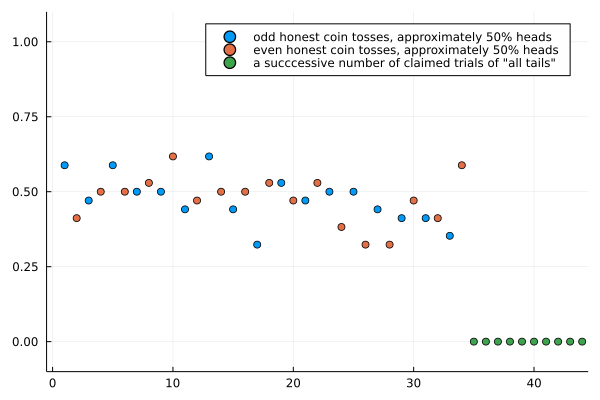

You have 34 data points.
If I toss 34 coins for 34 trials,

The resulting series can be divided into odd and even trials.
The two halfs are each an honest but inexact estimate of coin toss probability... 50%
They should be pretty similar and have a fairly high p under Mann Whitney U test.

In this case of 34 tosses each the probability the two halves are the same is:	88.92612026591786%
The even half adds tiny amount of information to the odd half, literally noise:	0.16932085082482023

But your data on <redacted> has questionable added suprise between odd and even <redacted>

Added by some null reports from <redacted> adding bits, in a ratio of 22.9

To get the same ratio of surprise we can add questionable "all tails" reports to evens until we get the same ratio.
We needed to claim these successive trials were all tails and even:	10
Which you can see on the graph are these trials:			35:45
They are precisely saying they always got tails as against the 34 accurate but imprecise reports.


In [82]:
using HypothesisTests
using Plots
using Random
using Statistics
using Test

function get_base_n()
    base_n::Int64 = 34
    return base_n
end

function get_L()
    L::Float64 = 22.9
    return L
end

function build_toss_estimates(base_n::Int64)
    rng                             = MersenneTwister(314)
    toss_estimates::Vector{Float64} = []
    for i in 1:base_n
        tosses   = bitrand(rng, base_n)
        estimate = mean(tosses)
        push!(toss_estimates, estimate)
    end
    return toss_estimates
end

function toss_Ltest()
    base_n          = get_base_n()
    L               = get_L()
    
    toss_estimates  = build_toss_estimates(base_n)
    
    odd_points      = [x for x in enumerate(toss_estimates) if  isodd(x[1])]
    even_points     = [x for x in enumerate(toss_estimates) if iseven(x[1])]
    
    odd_estimates   = [x[2] for x in  odd_points]
    even_estimates  = [x[2] for x in even_points]
    
    chance_are_same = pvalue(MannWhitneyUTest(odd_estimates, even_estimates))
    interhalf_info  = -log2(chance_are_same)
    
    println("You have ", base_n, " data points.")
    println("If I toss ", base_n," coins for ", base_n, " trials,")
    println("\nThe resulting series can be divided into odd and even trials.")
    println("The two halfs are each an honest but inexact estimate of coin toss probability... 50%")
    println("They should be pretty similar and have a fairly high p under Mann Whitney U test.")
    println("\nIn this case of ", base_n, " tosses each the probability the two halves are the same is:\t", 100*chance_are_same,"%")
    println("The even half adds tiny amount of information to the odd half, literally noise:\t", interhalf_info)
    println("\nBut your data on <redacted> has questionable added suprise between odd and even <redacted>")
    println("\nAdded by some null reports from <redacted> adding bits, in a ratio of ", L)
    println("\nTo get the same ratio of surprise we can add questionable \"all tails\" reports to evens until we get the same ratio.")
    
    fake_tails_claimed = 0
    loop_evens         = copy(even_estimates)
    proferred_L        = 0
    while proferred_L < L
        fake_tails_claimed += 1
        push!(loop_evens, 0)
        spoiled_p     = pvalue(MannWhitneyUTest(odd_estimates, loop_evens))
        spoiled_h     = -log2(spoiled_p)
        proferred_L   = (spoiled_h - interhalf_info) / interhalf_info
        if proferred_L >= L
            trailing_0s = (base_n+1):(base_n+1+fake_tails_claimed)
            println("We needed to claim these successive trials were all tails and even:\t", fake_tails_claimed)
            println("Which you can see on the graph are these trials:\t\t\t", trailing_0s)
            println("They are precisely saying they always got tails as against the ", base_n, " accurate but imprecise reports.")
            tossg           = scatter( [x[1] for x in odd_points], 
                               [x[2] for x in odd_points],
                                                            label="odd honest coin tosses, approximately 50% heads",
                                                            xlims=(-0.5,base_n+fake_tails_claimed+0.5), 
                                                            ylims=(-0.1,1.1))
    
            tossg           = scatter!([x[1] for x in even_points], 
                               [x[2] for x in even_points], label="even honest coin tosses, approximately 50% heads")
            tossg           = scatter!(collect(trailing_0s),zeros(fake_tails_claimed),
                                                            label="a succcessive number of claimed trials of \"all tails\"")
            
            display(tossg)
        end
        
    end
end

toss_Ltest()

function test_build_toss_estimates()
    for n in 1:40
        toss_estimates = build_toss_estimates(n)
        @test typeof(toss_estimates)    == Vector{Float64}
        @test length(toss_estimates)    == n
        @test 0 <= toss_estimates[1]    <= 1.0
        @test typeof(toss_estimates[1]) == Float64
    end
    println("passed build estimates")
end

function toss_tests()
    println("\n\n\n...just running some housekeeping tests")
    test_build_toss_estimates()
    println("passed all tests")
end

toss_tests()